In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import Counter

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [2]:
import pandas as pd
import numpy as np 

In [3]:
data = pd.read_csv('/content/drive/My Drive/car_data.csv')
data

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


# **Exploratory Data Analysis**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
data.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [ ]:
data.columns

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [ ]:
data.isna().any()

User ID         False
Gender          False
Age             False
AnnualSalary    False
Purchased       False
dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Visualizing Continuous Columns')

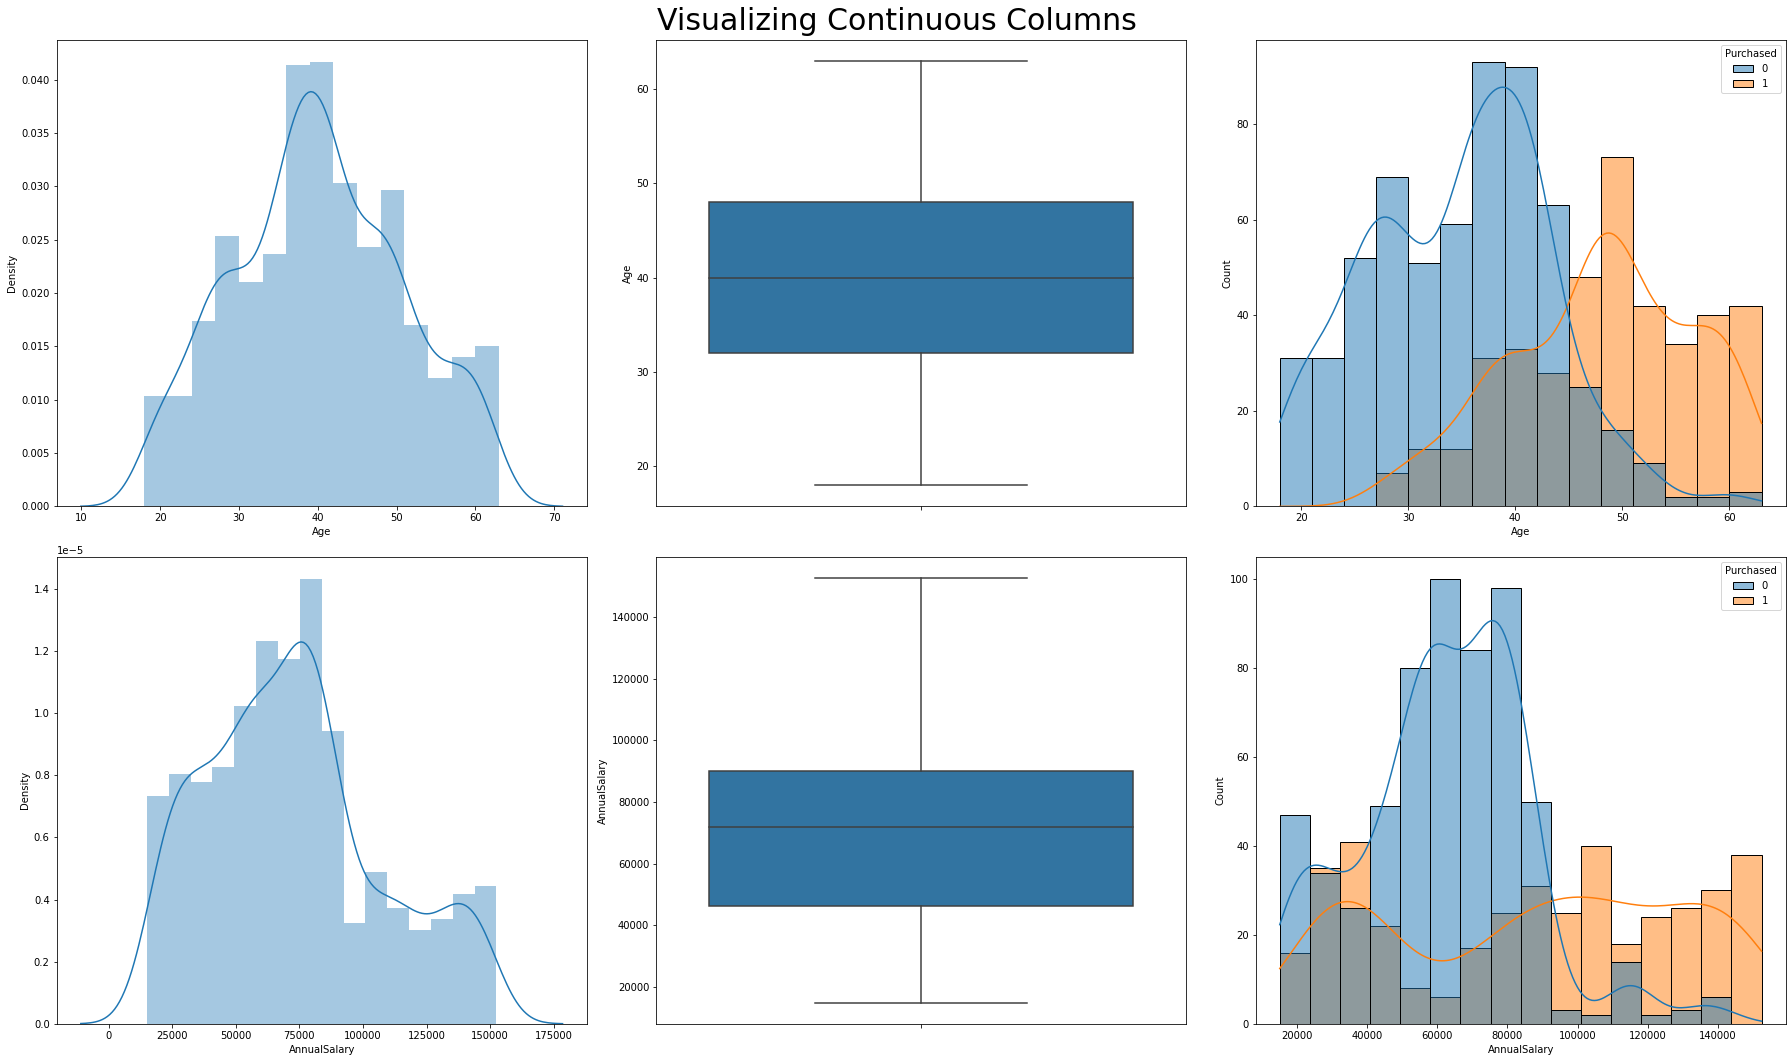

In [8]:
fig,ax=plt.subplots(2,3,figsize=(25,15))
sns.distplot(data['Age'],ax=ax[0,0])
sns.boxplot(y=data['Age'],ax=ax[0,1])
sns.histplot(data=data,x='Age',ax=ax[0,2],hue='Purchased',kde=True)

sns.distplot(data['AnnualSalary'],ax=ax[1,0])
sns.boxplot(y=data['AnnualSalary'],ax=ax[1,1])
sns.histplot(data=data,x='AnnualSalary',ax=ax[1,2],hue='Purchased',kde=True)
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Continuous Columns",fontsize=30)

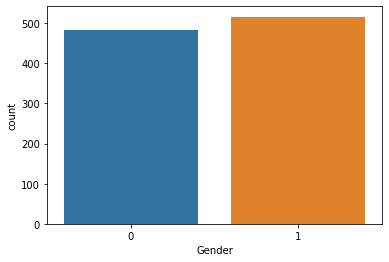

In [ ]:
sns.countplot(data=data,x='Gender')

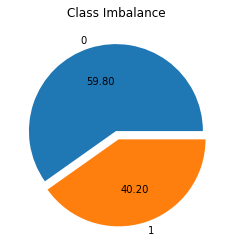

In [ ]:
plt.pie(data['Purchased'].value_counts(),labels=data['Purchased'].value_counts().index,autopct='%.2f',explode=[0,0.1])
plt.title("Class Imbalance")
plt.show()

# **Data Cleaning**

In [ ]:
data = data.drop(columns = "User ID")

In [ ]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [6]:
data['Gender'] = data['Gender'].str.replace('Male', '0')
data['Gender'] = data['Gender'].str.replace('Female', '1')
data['Gender'] = data['Gender'].astype(int)

**Correlation and HeatMap**

In [ ]:
hm = data.corr()
hm

,Gender,Age,AnnualSalary,Purchased
Gender,1.000000,0.084760,0.063301,0.047211
Age,0.084760,1.000000,0.166042,0.616036
AnnualSalary,0.063301,0.166042,1.000000,0.364974
Purchased,0.047211,0.616036,0.364974,1.000000


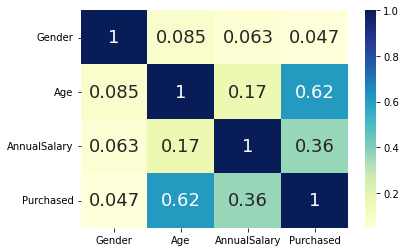

In [ ]:
HM = sns.heatmap(data.corr(),annot=True, annot_kws={'size':18}, cmap="YlGnBu")

**Splitting the data**

In [42]:
X = data.iloc[:,:-1]
y = data['Purchased']

In [10]:
X

,User ID,Gender,Age,AnnualSalary
0,385,0,35,20000
1,681,0,40,43500
2,353,0,49,74000
3,895,0,40,107500
4,661,0,25,79000
...,...,...,...,...
995,863,0,38,59000
996,800,1,47,23500
997,407,1,28,138500
998,299,1,48,134000


In [ ]:
X.shape

(1000, 3)

In [ ]:
y.shape

(1000,)

In [ ]:
y.value_counts()

0    598
1    402
Name: Purchased, dtype: int64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, stratify = y)

# **Classification**

### **Classification using Random Forest Classifier**

In [44]:
# Define and fit Model

Model = RandomForestClassifier(n_estimators = 100)
Model.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
# Make predictions
Predictions = Model.predict(X_test)

In [46]:
#Mean Absolute Error

MeanAE = mean_absolute_error(Predictions, y_test)
print("Mean Absolute Error with  Random Forest classifier:" , MeanAE)

Mean Absolute Error with  Random Forest classifier: 0.095


In [47]:
#Accuracy

Accuracy = sklearn.metrics.accuracy_score(y_test,Predictions)
print('Accuracy for Random Forest classifier model is - ', Accuracy)

Accuracy for Random Forest classifier model is -  0.905


In [48]:
#Precision Score

PrecisionScore = sklearn.metrics.precision_score(y_test, Predictions, labels= Model.classes_)
print("Precision score for Random Forest Classifier is  ", PrecisionScore)

Precision score for Random Forest Classifier is   0.8505747126436781


In [49]:
#Classification Report

Clf_Report = classification_report(y_test, Predictions)
print(Clf_Report)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       120
           1       0.85      0.93      0.89        80

    accuracy                           0.91       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200



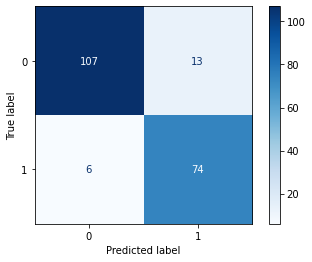

In [50]:
#Confusion Matrix

CM = confusion_matrix(y_test, Model.predict(X_test), labels=Model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM,
                              display_labels=Model.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')

I got a precsion score of **95 for '0'** label and **85 for '1'** label. Also, we achieved an **accuracy of 91%**.

### **Classification using Random Over Sampler**

In [51]:
# Reshape the data

X, y = make_classification(n_classes = 2, class_sep = 2, weights = [0.598, 0.402], 
                           n_informative = 3, n_redundant = 1, flip_y = 0, n_features = 20,
                          n_clusters_per_class = 1, n_samples = 1000, random_state = 10)

print('Orignal dataset shape %s' % Counter(y))

Orignal dataset shape Counter({0: 598, 1: 402})


In [52]:
ros = RandomOverSampler(random_state = 42)
X_res, y_res = ros.fit_resample(X, y)

print('Reshaped dataset shape %s' % Counter(y_res))

Reshaped dataset shape Counter({0: 598, 1: 598})


In [53]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state = 42, test_size = 0.2, stratify = y_res)

In [54]:
# Define and Fit model

Model_1 = RandomForestClassifier() 
Model_1.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
#Make predictions

Predictions_1 = Model_1.predict(X_test)

In [56]:
#Accuracy

Accuracy = sklearn.metrics.accuracy_score(y_test,Predictions_1)
print('Accuracy for Random Forest classifier model is - ', Accuracy)

Accuracy for Random Forest classifier model is -  0.9916666666666667


In [57]:
#Classification Report

Clf_Report = classification_report(y_test, Predictions_1)
print(Clf_Report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       120
           1       0.98      1.00      0.99       120

    accuracy                           0.99       240
   macro avg       0.99      0.99      0.99       240
weighted avg       0.99      0.99      0.99       240



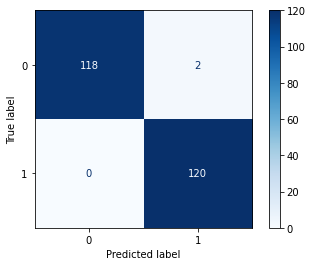

In [58]:
CM = confusion_matrix(y_test, Model_1.predict(X_test), labels=Model_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM,
                              display_labels=Model_1.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')

I achieved accuracy of 99% using Random Over Sampler with Random forest classifier



# **Conclusion**

Best accuracy is obtained by Random Forest Classifier trained using data from RandomOverSampler or Oversampling, but over sampling can also lead to overfitting sometimes.